![image.png](attachment:image.png)

In [1]:
#!python -m pip install --upgrade pip

#!pip install tensorflow==2.3.1 

#!pip install tensorboard==2.4.1
!pip install torch  #YOLOv5 runs on top of PyTorch, so we need to import it to the notebook

In [ ]:
|!unzip "/content/allRCss.zip" -d "/content"

In [ ]:
import torch # YOLOv5 implemented using pytorch

In [ ]:
from IPython.display import Image #this is to render predictions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 7292, done.
remote: Counting objects: 100% (398/398), done.
remote: Compressing objects: 100% (233/233), done.
remote: Total 7292 (delta 250), reused 276 (delta 165), pack-reused 6894
Receiving objects: 100% (7292/7292), 9.19 MiB | 25.86 MiB/s, done.
Resolving deltas: 100% (4988/4988), done.


In [3]:
%cd yolov5

/content/yolov5


In [ ]:
!rm -r /content/train_data/images/sample_data

In [ ]:
mv /content/train_data/images/val/allRCss /content

In [4]:
!pip install -r requirements.txt

     |████████████████████████████████| 645kB 7.8MB/s 
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!unzip /content/This_is_final.zip  -d /content/

# Divide the dataset in train and val folder. 

In [ ]:

import os
from random import choice
import shutil

#arrays to store file names
imgs =[]
xmls =[]

#setup dir names
trainPath = '/content/train_data/images/train'
valPath = '/content/train_data/images/val'
crsPath = '/content/drive/MyDrive/allRCss' #dir where images and annotations stored

#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.8
val_ratio = 0.2


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)


training images are :  25
Validation images are :  6


In [ ]:
!mv /content/yolov5/allRCss /content

In [ ]:

trainimagePath = '/content/train_data/images/train'
trainlabelPath = '/content/train_data/labels/train'
valimagePath = '/content/train_data/images/val'
vallabelPath = '/content/train_data/labels/val'
#cycle for train dir
for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)



#cycle for test dir   
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    
    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
shutil.move(crsPath, valPath) 




'/content/train_data/images/val/allRCss'

In [7]:
!mv /content/data.yaml /content/yolov5/data

# Create dataset.yaml

### move the dataset’s dataset.yaml file to the /content/yolov5/data directory. 
### This file contains information required by YOLO to train the model on the custom data. 

![image.png](attachment:image.png)

In [11]:
!python train.py --img 416 --batch 8 --epochs 100 --data data.yaml --weights yolov5s.pt --cache

github: ⚠️ WARNING: code is out of date by 1 commit. Use 'git pull' to update or 'git clone https://github.com/ultralytics/yolov5' to download latest.
YOLOv5 🚀 v5.0-213-gbf209f6 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=8, bbox_interval=-1, bucket='', cache_images=True, cfg='', data='./data/data.yaml', device='', entity=None, epochs=100, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[416, 416], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp4', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=8, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_

## At the end of the training, two files should be saved in yolov5/runs/train/exp/weights: last.pt and best.pt. We’ll use best.pt.

## Explore the metrics recorded during training, I suggest you use TensorBoard, a very interactive exploration tool:

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 16660), started 3:38:43 ago. (Use '!kill 16660' to kill it.)

## Let’s explore now how confident our model is. We can plot a validation batch obtained during training and inspect the confidence score of each label

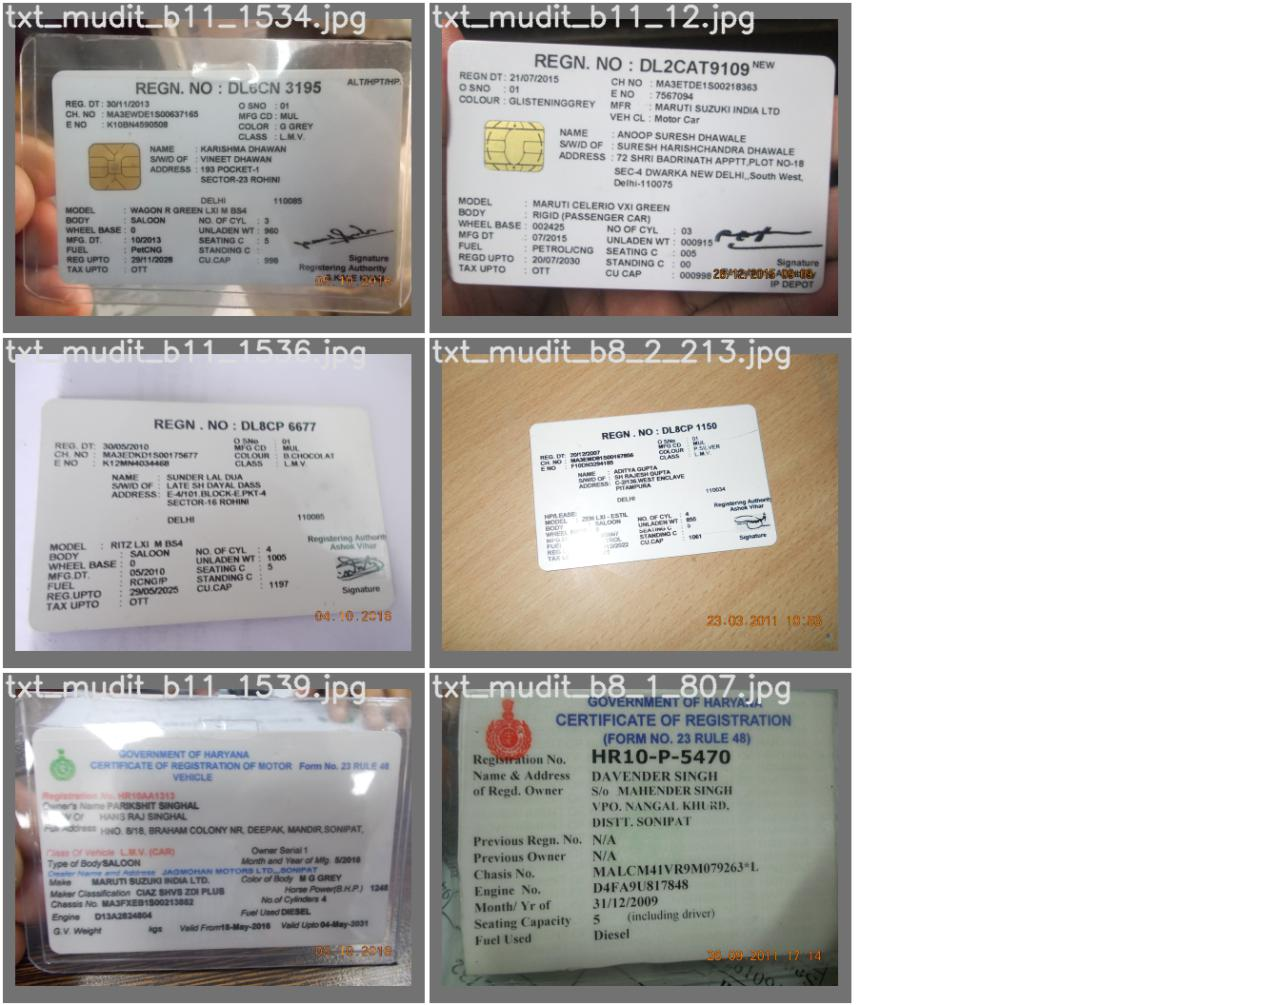

In [ ]:
Image(filename='runs/train/exp2/test_batch1_pred.jpg', width=1000)


Training losses and performance metrics are also logged to Tensorboard and a custom results.txt logfile which is plotted as results.png (below) after training completes. 

You’ll be implementing the detect.py script with the best.pt weights and image dimensions of 416x416 pixels (it’s really important to comply with that). The results will be saved to runs/detect/exp. To display the results, run the following code:

In [ ]:
#!python detect.py --source runs/train/exp/testimg.jpg --weights runs/train/exp/weights/best.pt --conf 0.25

!python detect.py --source runs/train/exp2/test_batch1_pred.jpg --weights runs/train/exp2/weights/best.pt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, half=False, hide_conf=False, hide_labels=False, imgsz=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='runs/train/exp2/test_batch1_pred.jpg', update=False, view_img=False, weights=['runs/train/exp2/weights/best.pt'])
YOLOv5 🚀 v5.0-209-gf527704 torch 1.8.1+cu101 CPU

Fusing layers... 
Model Summary: 224 layers, 7064698 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/yolov5/runs/train/exp2/test_batch1_pred.jpg: 512x640 Done. (0.405s)
Results saved to runs/detect/exp3
Done. (0.475s)


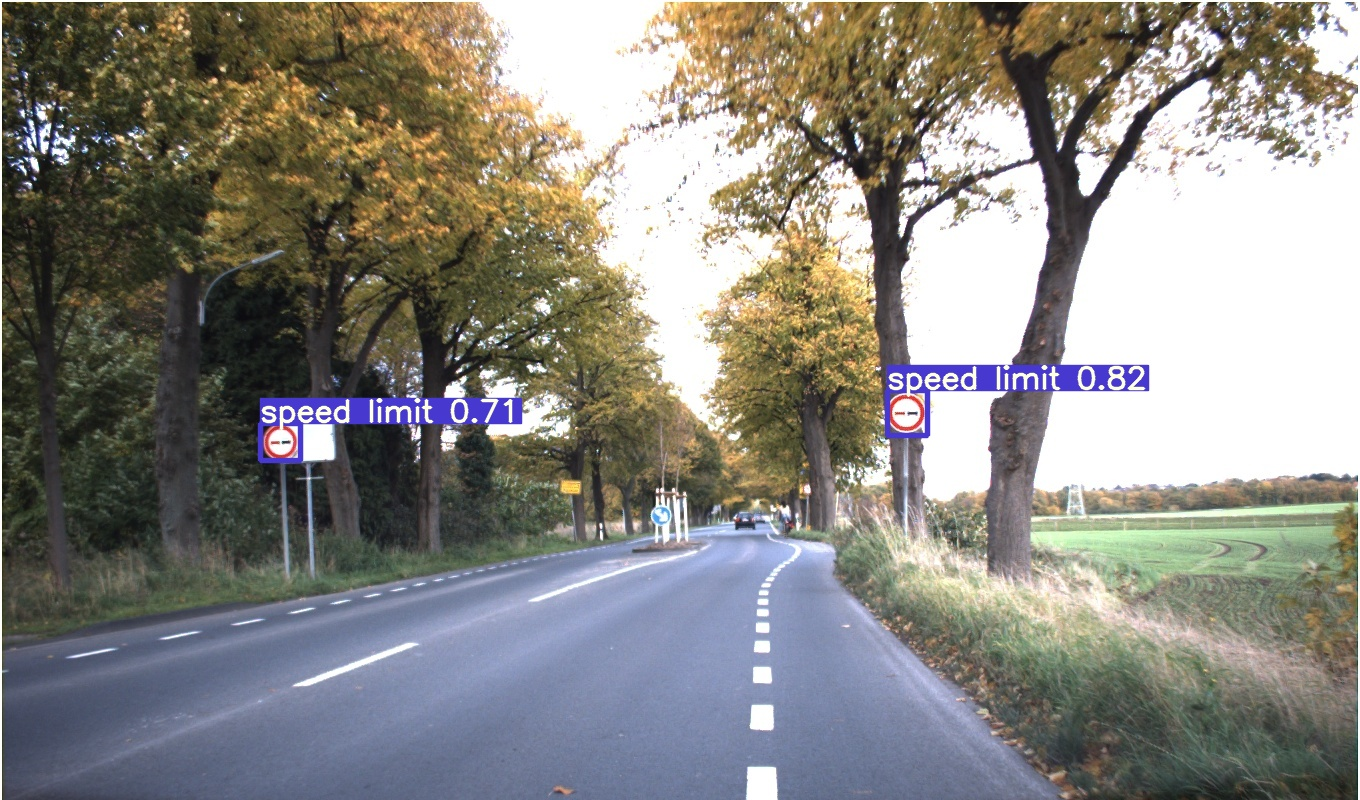

In [ ]:
Image(filename='runs/detect/exp4/a.jpg', width=416)


In [ ]:
from utils.plots import plot_results 
plot_results(save_dir='runs/train/exp2')  # plot results.txt as results.png